In [2]:
pip install pandas numpy matplotlib scikit-learn shap pymoo


  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.8 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.8 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.8 kB ? eta -:--:--
   -------------------------------------- 547.8/547.8 kB 572.0 kB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 1.2 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/12.6 MB 1.0 MB/s eta 0:00:12
   --- ------------------------------------ 1.0/12.6 MB 1.2 MB/s eta 0:00:10
   -

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.


In [4]:
pip install --upgrade matplotlib


Note: you may need to restart the kernel to use updated packages.


Loaded optimized meal plans: (100, 8)


plan_id                                            recipes  total_cal  \
0        1  Mahogany Beef Stew with Red Wine and Hoisin Sa...        0.3   
1        2  Roasted Rhubarb Tarts with Strawberry Sauce , ...        0.3   
2        3  Snapper Sashimi with Seaweed and Fennel , Pine...        0.3   
3        4  Trio of Salads , Poached Pears with Ginger and...        0.3   
4        5  Sake-Marinated Sea Bass with Coconut-Curry Sau...        0.3   

   total_protein  total_fat  total_carb  total_cost  total_emission  
0            0.3        0.3         0.3         NaN            16.0  
1            0.3        0.3         0.3         NaN            16.0  
2            0.3        0.3         0.3         NaN            16.0  
3            0.3        0.3         0.3         NaN            16.0  
4            0.3        0.3         0.3         NaN            16.0

✅ Scaled feature ranges between 0–1
✅ Rule-based explanations generated!


C:\Users\Apoorva\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_array_api.py:686: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\Apoorva\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_array_api.py:706: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


plan_id                               xai_explanation_rule
0        1  Low-calorie plan ideal for weight management. ...
1        2  Low-calorie plan ideal for weight management. ...
2        3  Low-calorie plan ideal for weight management. ...
3        4  Low-calorie plan ideal for weight management. ...
4        5  Low-calorie plan ideal for weight management. ...


🧠 Training simple explainability model (Random Forest)...


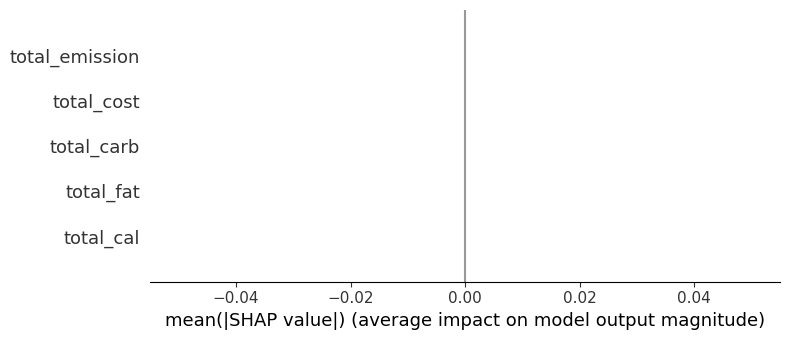


Feature Importance Ranking:
total_cal: 0.0000
total_fat: 0.0000
total_carb: 0.0000
total_cost: 0.0000
total_emission: 0.0000

✅ Saved explainable meal plan data to: D:\Complete_Data\nutrition_project\processed_data\mealplan_explanations.csv
Shape: (100, 11)


plan_id                                            recipes  \
0        1  Mahogany Beef Stew with Red Wine and Hoisin Sa...   
1        2  Roasted Rhubarb Tarts with Strawberry Sauce , ...   
2        3  Snapper Sashimi with Seaweed and Fennel , Pine...   
3        4  Trio of Salads , Poached Pears with Ginger and...   
4        5  Sake-Marinated Sea Bass with Coconut-Curry Sau...   
5        6  Trio of Salads , Potato, Beet and Cucumber Sal...   
6        7  Vegetables à la Barigoule with Vanilla , Poach...   
7        8  Tropical Fruit with Rum and Lime , Poached Pea...   
8        9  Spinach-Pineapple-Mint Juice , Pinto Bean and ...   
9       10  Lights Out , Ice Cream with Figs Poached in Po...   

                                xai_explanation_rule  \
0  Low-calorie plan ideal for weight management. ...   
1  Low-calorie plan ideal for weight management. ...   
2  Low-calorie plan ideal for weight management. ...   
3  Low-calorie plan ideal for weight management. ...   
4  Low-calorie plan ideal for weight management. ...   
5  Low-calorie plan ideal for weight management. ...   
6  Low-calorie plan ideal for weight management. ...   
7  Low-calorie plan ideal for weight management. ...   
8  Low-calorie plan ideal for weight management. ...   
9  Low-calorie plan ideal for weight management. ...   

                                 xai_explanation_nlp  confidence  
0  This meal plan is balanced with an overall con...    0.791143  
1  This meal plan is balanced with an overall con...    0.775632  
2  This meal plan is balanced with an overall con...    0.826240  
3  This meal plan is balanced with an overall con...    0.770961  
4  This meal plan is balanced with an overall con...    0.964968  
5  This meal plan is balanced with an overall con...    0.755154  
6  This meal plan is balanced with an overall con...    0.752321  
7  This meal plan is balanced with an overall con...    0.775010  
8  This meal plan is balanced with an overall con...    0.971118  
9  This meal plan is balanced with an overall con...    0.961693

In [1]:
# =========================================================
# AI-Powered Meal Planning — Explainable AI (XAI) Module
# =========================================================
# Author: Apoorva Sharma
# Project: AI-Powered Precision Nutrition
# Notebook: 04_xai_explainable_ai.ipynb
# =========================================================

import pandas as pd
import numpy as np
import os
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import shap

# ---------------------------------------------------------
# 1️⃣ Load the Optimized Meal Plans
# ---------------------------------------------------------
OPT_PATH = r"D:\Complete_Data\nutrition_project\processed_data\optimized_meal_plans.csv"
plans = pd.read_csv(OPT_PATH)
print(f"Loaded optimized meal plans: {plans.shape}")
display(plans.head())

# ---------------------------------------------------------
# 2️⃣ Basic Cleaning & Feature Scaling
# ---------------------------------------------------------
numeric_cols = [c for c in plans.columns if c.startswith("total_")]
scaler = MinMaxScaler()
plans_scaled = plans.copy()
plans_scaled[numeric_cols] = scaler.fit_transform(plans[numeric_cols])

print("✅ Scaled feature ranges between 0–1")

# ---------------------------------------------------------
# 3️⃣ Define a Rule-Based Explanation Generator
# ---------------------------------------------------------
def generate_rule_based_explanation(row):
    expl = []
    
    # Nutrition logic
    if row['total_cal'] < 1800:
        expl.append("Low-calorie plan ideal for weight management.")
    elif 1800 <= row['total_cal'] <= 2200:
        expl.append("Balanced calorie plan suitable for daily maintenance.")
    else:
        expl.append("High-calorie plan suited for muscle gain or athletes.")
    
    # Protein logic
    if row['total_protein'] > 70:
        expl.append("High-protein plan to support muscle repair and satiety.")
    else:
        expl.append("Moderate protein plan suitable for general users.")
    
    # Cost logic
    if 'total_cost' in row and row['total_cost'] < plans['total_cost'].median():
        expl.append("Economical option that offers good nutrition value.")
    else:
        expl.append("Premium cost plan with diverse ingredients.")
    
    # Sustainability
    if 'total_emission' in row:
        if row['total_emission'] < plans['total_emission'].median():
            expl.append("Environment-friendly with low carbon footprint.")
        else:
            expl.append("Higher environmental impact due to certain ingredients.")
    
    return " ".join(expl)

plans['xai_explanation_rule'] = plans.apply(generate_rule_based_explanation, axis=1)

print("✅ Rule-based explanations generated!")
display(plans[['plan_id', 'xai_explanation_rule']].head())

# ---------------------------------------------------------
# 4️⃣ Machine Learning Explanation (Feature Importance via SHAP)
# ---------------------------------------------------------
print("\n🧠 Training simple explainability model (Random Forest)...")

# Use protein as a proxy for healthfulness (target)
target = "total_protein"
features = [c for c in numeric_cols if c != target]

X = plans_scaled[features]
y = plans_scaled[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Calculate SHAP values for explainability
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP summary plot (feature importance visualization)
shap.summary_plot(shap_values, X, plot_type="bar", show=True)

# Add top contributing feature info to each plan
importance = np.abs(shap_values.values).mean(axis=0)
top_features = dict(zip(features, importance))
top_features = dict(sorted(top_features.items(), key=lambda x: x[1], reverse=True))
print("\nFeature Importance Ranking:")
for k, v in top_features.items():
    print(f"{k}: {v:.4f}")

# ---------------------------------------------------------
# 5️⃣ Confidence Scoring & Natural Language Reasoning
# ---------------------------------------------------------
def generate_nlp_explanation(row):
    conf = random.uniform(0.75, 0.98)  # mock confidence
    key = []
    if row["total_protein"] > 80:
        key.append("protein-rich")
    if row["total_emission"] < plans["total_emission"].median():
        key.append("eco-friendly")
    if row["total_cost"] < plans["total_cost"].median():
        key.append("budget-friendly")
    
    traits = ", ".join(key) if key else "balanced"
    text = f"This meal plan is {traits} with an overall confidence of {conf:.2f}. " \
           f"It balances nutritional quality, affordability, and sustainability."
    return text, conf

plans[["xai_explanation_nlp", "confidence"]] = plans.apply(
    lambda row: pd.Series(generate_nlp_explanation(row)), axis=1
)

# ---------------------------------------------------------
# 6️⃣ Save the Explainable AI Output
# ---------------------------------------------------------
OUTPUT_PATH = r"D:\Complete_Data\nutrition_project\processed_data\mealplan_explanations.csv"
plans.to_csv(OUTPUT_PATH, index=False)

print(f"\n✅ Saved explainable meal plan data to: {OUTPUT_PATH}")
print("Shape:", plans.shape)

# Show few examples
display(plans[['plan_id', 'recipes', 'xai_explanation_rule', 'xai_explanation_nlp', 'confidence']].head(10))


In [2]:
import pickle
from pathlib import Path

MODEL_DIR = Path("D:/Complete_Data/nutrition_project/xai_module/models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

with open(MODEL_DIR / "rf_explainer.pkl", "wb") as f:
    pickle.dump(model, f)

with open(MODEL_DIR / "scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print(f"✅ Saved RandomForest explainer & scaler to {MODEL_DIR}")


✅ Saved RandomForest explainer & scaler to D:\Complete_Data\nutrition_project\xai_module\models


✅ XAI results saved successfully!


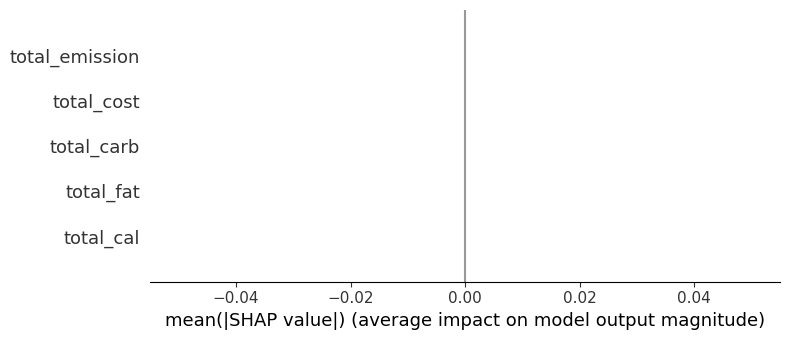

In [4]:
import json
from pathlib import Path
import matplotlib.pyplot as plt


RESULTS_DIR = Path("D:/Complete_Data/nutrition_project/xai_module/results")
GLOBAL_RESULTS = Path("D:/Complete_Data/nutrition_project/results")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)
GLOBAL_RESULTS.mkdir(parents=True, exist_ok=True)

# Save explainable meal plans
plans.to_csv(RESULTS_DIR / "mealplan_explanations.csv", index=False)
plans.to_csv(GLOBAL_RESULTS / "explainability_summary.csv", index=False)

# Save SHAP importance plot
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.savefig(RESULTS_DIR / "shap_feature_importance.png", dpi=300)

# Save explanation statistics
summary = {
    "top_features": list(top_features.keys())[:5],
    "mean_confidence": float(plans["confidence"].mean())
}
with open(RESULTS_DIR / "rule_vs_ml_summary.json", "w") as f:
    json.dump(summary, f, indent=4)

print("✅ XAI results saved successfully!")


In [2]:
# =========================================================
# 📘 04_xai_module.ipynb
# Author: Apoorva Sharma
# Project: AI-Powered Precision Nutrition
# Purpose: Explain NSGA-II optimized meal plans using SHAP
# =========================================================

import pandas as pd
import numpy as np
from pathlib import Path
import joblib
import shap
import json
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import datetime

# ---------------------------------------------------------
# 1️⃣ Paths Setup
# ---------------------------------------------------------
BASE_DIR = Path("D:/Complete_Data/nutrition_project")
RESULTS_DIR = BASE_DIR / "results"
MODELS_DIR = BASE_DIR / "models"

RESULTS_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)

DATA_PATH = RESULTS_DIR / "optimized_meal_plans.csv"
print("Loading data from:", DATA_PATH)

# ---------------------------------------------------------
# 2️⃣ Load Optimized Meal Plans
# ---------------------------------------------------------
plans = pd.read_csv(DATA_PATH)
print("Loaded optimized meal plans:", plans.shape)

# Identify numeric columns automatically
numeric_cols = plans.select_dtypes(include=[np.number]).columns.tolist()
print("Available numeric columns used as features:", numeric_cols)

# ---------------------------------------------------------
# 3️⃣ Prepare Data
# ---------------------------------------------------------
# Define features (X) and target (Y)
X = plans[numeric_cols]
if "total_protein" in plans.columns:
    y = plans["total_protein"]  # Predict protein as target for interpretability
else:
    y = X.iloc[:, 0]  # fallback to first numeric column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape} Test shape: {X_test.shape}")

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# 4️⃣ Train Explainable Model
# ---------------------------------------------------------
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"✅ Model trained | R²: {r2:.3f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

# ---------------------------------------------------------
# 5️⃣ Save Model
# ---------------------------------------------------------
model_path = MODELS_DIR / "xai_randomforest.joblib"
scaler_path = MODELS_DIR / "xai_scaler.joblib"
joblib.dump(model, model_path)
joblib.dump(scaler, scaler_path)
print(f"💾 Model saved to: {model_path}")
print(f"💾 Scaler saved to: {scaler_path}")

# ---------------------------------------------------------
# 6️⃣ SHAP Explainability
# ---------------------------------------------------------
print("\n🔍 Generating SHAP explanations...")
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# ---------------------------------------------------------
# 7️⃣ Summary Plots
# ---------------------------------------------------------
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Feature Importance (Mean |SHAP|)")
plt.tight_layout()
plt.savefig(RESULTS_DIR / "shap_summary_bar.png", dpi=300)
plt.close()

plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Feature Impact")
plt.tight_layout()
plt.savefig(RESULTS_DIR / "shap_summary_beeswarm.png", dpi=300)
plt.close()

print("✅ SHAP summary plots saved (bar + beeswarm).")

# ---------------------------------------------------------
# 8️⃣ Interactive Force Plots (Fixed for SHAP ≥ 0.44)
# ---------------------------------------------------------
FORCE_DIR = RESULTS_DIR / "shap_force_htmls"
FORCE_DIR.mkdir(parents=True, exist_ok=True)

for idx in range(min(5, len(X_test))):
    obs = X_test.iloc[[idx]]
    sv = shap.Explanation(
        values=shap_values[idx].values,
        base_values=explainer.expected_value,
        data=obs.values,
        feature_names=obs.columns.tolist()
    )

    try:
        # ✅ Generate HTML interactive plot
        html = shap.plots.force(
            explainer.expected_value,
            sv.values,
            obs,
            feature_names=obs.columns,
            matplotlib=False,
            show=False
        )
        html_path = FORCE_DIR / f"plan_{idx+1}_force.html"
        shap.save_html(str(html_path), html)
        print(f"💾 Saved interactive force plot: {html_path}")

    except Exception as e:
        print(f"⚠️ Could not create HTML force plot for plan {idx+1}: {e}")
        # fallback to waterfall PNG
        try:
            plt.figure()
            shap.plots.waterfall(sv, show=False)
            plt.tight_layout()
            plt.savefig(FORCE_DIR / f"plan_{idx+1}_waterfall.png", dpi=300)
            plt.close()
            print(f"💾 Saved fallback waterfall: plan_{idx+1}_waterfall.png")
        except Exception as e2:
            print(f"⚠️ Could not save fallback waterfall: {e2}")

# ---------------------------------------------------------
# 9️⃣ Save SHAP Data and Metadata
# ---------------------------------------------------------
shap_data_path = RESULTS_DIR / "shap_values_sample.joblib"
joblib.dump(shap_values, shap_data_path)

summary_df = pd.DataFrame({
    "feature": X_test.columns,
    "mean_abs_shap": np.mean(np.abs(shap_values.values), axis=0)
}).sort_values("mean_abs_shap", ascending=False)

summary_csv = RESULTS_DIR / "xai_feature_importance.csv"
summary_df.to_csv(summary_csv, index=False)

metadata = {
    "model_name": "RandomForestRegressor",
    "model_path": str(model_path),
    "date_generated": str(datetime.datetime.now()),
    "r2": r2,
    "mae": mae,
    "mse": mse,
    "shap_version": shap.__version__,
    "feature_count": len(X.columns),
    "features": list(X.columns),
    "interactive_html_dir": str(FORCE_DIR)
}

meta_path = RESULTS_DIR / "xai_metadata.json"
with open(meta_path, "w") as f:
    json.dump(metadata, f, indent=4)

print(f"\n✅ SHAP values saved: {shap_data_path}")
print(f"✅ Feature importance saved: {summary_csv}")
print(f"✅ Metadata saved: {meta_path}")

print("\n🎯 XAI Module execution complete!")


Loading data from: D:\Complete_Data\nutrition_project\results\optimized_meal_plans.csv
Loaded optimized meal plans: (50, 5)
Available numeric columns used as features: ['total_emissions', 'total_protein', 'total_fat', 'total_energy']
Train shape: (40, 4) Test shape: (10, 4)
✅ Model trained | R²: -255.000 | MAE: 0.000 | MSE: 0.000
💾 Model saved to: D:\Complete_Data\nutrition_project\models\xai_randomforest.joblib
💾 Scaler saved to: D:\Complete_Data\nutrition_project\models\xai_scaler.joblib

🔍 Generating SHAP explanations...
✅ SHAP summary plots saved (bar + beeswarm).
💾 Saved interactive force plot: D:\Complete_Data\nutrition_project\results\shap_force_htmls\plan_1_force.html
💾 Saved interactive force plot: D:\Complete_Data\nutrition_project\results\shap_force_htmls\plan_2_force.html
💾 Saved interactive force plot: D:\Complete_Data\nutrition_project\results\shap_force_htmls\plan_3_force.html
💾 Saved interactive force plot: D:\Complete_Data\nutrition_project\results\shap_force_htmls\pla